In [1]:
import os, pickle, torch
from model_exercise6_solution import GPT
from matplotlib import pyplot as plt

In [2]:
DATA_DIR = "data/"
MODEL_DIR = "models/"
CHECKPOINT = "base.pt"

In [3]:
device = "cpu"
if torch.cuda.is_available():
    device="cuda"
elif torch.backends.mps.is_available():
    device="mps"
print("device =", device)

device = mps


In [4]:
checkpoint = torch.load(MODEL_DIR + CHECKPOINT, map_location=device)
config = checkpoint["config"]
model = GPT(config)
state_dict = checkpoint["model"]
unwanted_prefix = "_orig_mod."
for k, v in list(state_dict.items()):
    if k.startswith(unwanted_prefix):
        state_dict[k[len(unwanted_prefix) :]] = state_dict.pop(k)
model.load_state_dict(state_dict)
print("best val loss =", checkpoint["best_val_loss"].item())

total parameters: 1641450
best val loss = 2.071629047393799


In [5]:
with open(DATA_DIR + "meta.pkl", "rb") as f:
    meta = pickle.load(f)
stoi, itos = meta["stoi"], meta["itos"]
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: "".join([itos[i] for i in l])

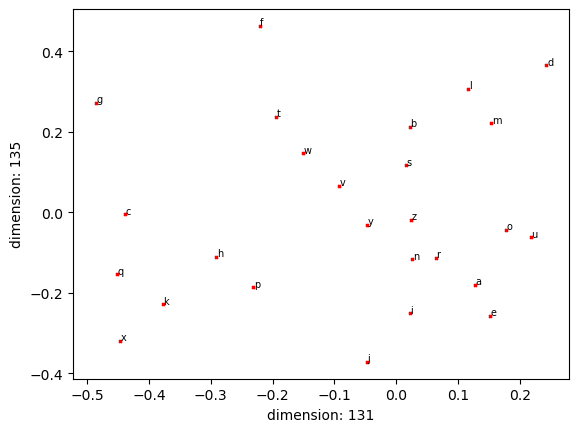

In [6]:
dims = torch.randint(config["n_embd"], (1, 2))
dim1, dim2 = dims[0, 0].item(), dims[0, 1].item()
for c_i in range(26):
    x, y = model.transformer.wte.weight[c_i, dim1].item(),model.transformer.wte.weight[c_i, dim2].item()
    plt.scatter(x, y, marker="x", color="red", s=4)
    plt.text(x + 0.001, y + 0.001, itos[c_i], fontsize=7)
plt.xlabel("dimension: " + str(dim1))
plt.ylabel("dimension: " + str(dim2))
plt.show()

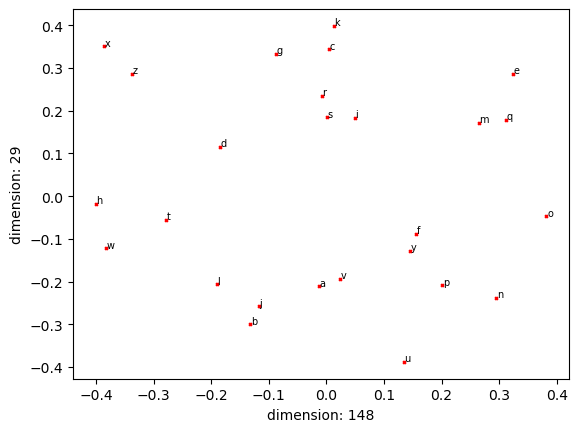

In [7]:
dims = torch.randint(config["n_embd"], (1, 2))
dim1, dim2 = dims[0, 0].item(), dims[0, 1].item()
for c_i in range(26):
    x, y = model.transformer.wte.weight[c_i, dim1].item(),model.transformer.wte.weight[c_i, dim2].item()
    plt.scatter(x, y, marker="x", color="red", s=4)
    plt.text(x + 0.001, y + 0.001, itos[c_i], fontsize=7)
plt.xlabel("dimension: " + str(dim1))
plt.ylabel("dimension: " + str(dim2))
plt.show()

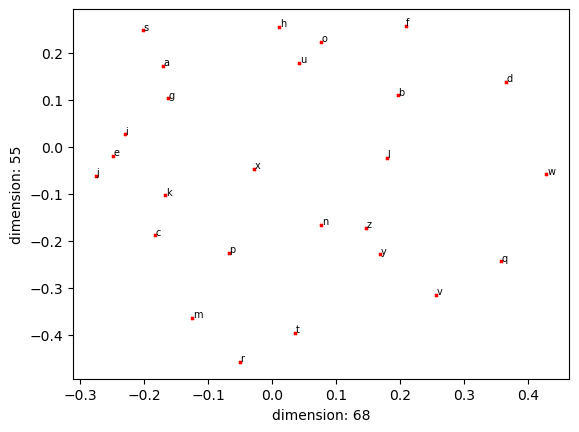

In [8]:
dims = torch.randint(config["n_embd"], (1, 2))
dim1, dim2 = dims[0, 0].item(), dims[0, 1].item()
for c_i in range(26):
    x, y = model.transformer.wte.weight[c_i, dim1].item(),model.transformer.wte.weight[c_i, dim2].item()
    plt.scatter(x, y, marker="x", color="red", s=4)
    plt.text(x + 0.001, y + 0.001, itos[c_i], fontsize=7)
plt.xlabel("dimension: " + str(dim1))
plt.ylabel("dimension: " + str(dim2))
plt.show()

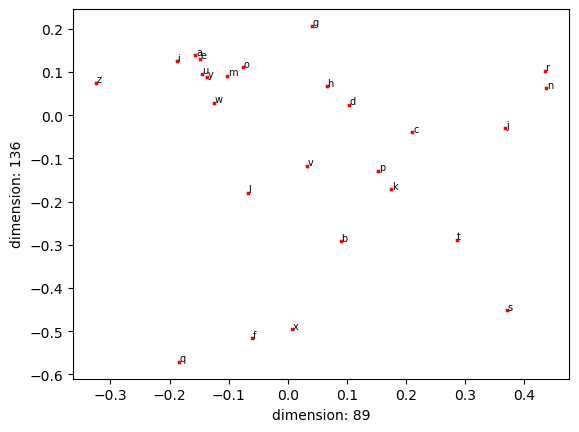

In [9]:
dims = torch.randint(config["n_embd"], (1, 2))
dim1, dim2 = dims[0, 0].item(), dims[0, 1].item()
for c_i in range(26):
    x, y = model.transformer.wte.weight[c_i, dim1].item(),model.transformer.wte.weight[c_i, dim2].item()
    plt.scatter(x, y, marker="x", color="red", s=4)
    plt.text(x + 0.001, y + 0.001, itos[c_i], fontsize=7)
plt.xlabel("dimension: " + str(dim1))
plt.ylabel("dimension: " + str(dim2))
plt.show()

In [10]:
for c_i in range(26):
    sim = {}
    for c_j in range(26):
        if c_j == c_i:
            continue
        sim[c_j] = round(torch.dot(model.transformer.wte.weight[c_i],
                                   model.transformer.wte.weight[c_j]).item(),2)
    sim = sorted(sim.items(), key=lambda item: item[1], reverse=True)
    print("similar chars to " + itos[c_i] + ": "
        + itos[sim[0][0]] + "(" + str(sim[0][1]) + ")" + ", "
        + itos[sim[1][0]] + "(" + str(sim[1][1]) + ")" + ", "
        + itos[sim[2][0]] + "(" + str(sim[2][1]) + ")")

similar chars to a: e(0.64), o(0.58), i(0.42)
similar chars to b: v(2.77), p(2.03), w(1.08)
similar chars to c: x(2.61), q(1.82), k(1.67)
similar chars to d: g(1.14), f(1.02), q(0.88)
similar chars to e: i(0.75), a(0.64), o(0.57)
similar chars to f: q(3.8), p(2.12), x(1.45)
similar chars to g: x(2.64), q(2.53), f(1.37)
similar chars to h: w(0.57), z(0.4), x(0.28)
similar chars to i: e(0.75), u(0.6), y(0.51)
similar chars to j: x(2.2), z(1.85), q(1.23)
similar chars to k: q(3.32), c(1.67), g(0.73)
similar chars to l: r(0.55), t(0.49), d(0.44)
similar chars to m: b(1.05), k(0.7), v(0.7)
similar chars to n: m(0.57), r(0.51), l(0.34)
similar chars to o: u(1.28), a(0.58), e(0.57)
similar chars to p: f(2.12), b(2.03), q(1.67)
similar chars to q: x(4.89), f(3.8), k(3.32)
similar chars to r: l(0.55), n(0.51), m(0.13)
similar chars to s: x(1.57), z(1.14), c(0.87)
similar chars to t: p(0.74), d(0.51), l(0.49)
similar chars to u: o(1.28), i(0.6), w(0.37)
similar chars to v: b(2.77), x(2.51), w(2.

In [11]:
stoi["{"], stoi["}"]

(27, 28)

In [12]:
for c_i in [27, 28]:
    sim = {}
    for c_j in range(26):
        if c_j == c_i:
            continue
        sim[c_j] = round(torch.dot(model.transformer.wte.weight[c_i],
                                   model.transformer.wte.weight[c_j]).item(),2)
    sim = sorted(sim.items(), key=lambda item: item[1], reverse=True)
    print("similar chars to " + itos[c_i] + ": "
        + itos[sim[0][0]] + "(" + str(sim[0][1]) + ")" + ", "
        + itos[sim[1][0]] + "(" + str(sim[1][1]) + ")" + ", "
        + itos[sim[2][0]] + "(" + str(sim[2][1]) + ")")

similar chars to {: x(7.47), q(6.65), v(3.86)
similar chars to }: n(0.24), a(0.04), e(-0.02)
